In [2]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

/var/folders/r3/9pd4qyx51zscl5qqhdg53t_h0000gn/T/ipykernel_7786/3112176153.py:1: DtypeWarning: Columns (15,17) have mixed types. Specify dtype option on import or set low_memory=False.
  db = pd.read_csv('../data/processed/balanced/real.csv')


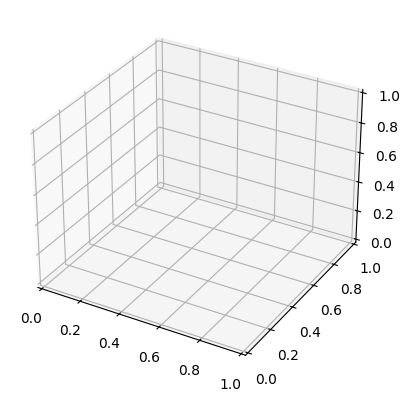

In [5]:
db = pd.read_csv('../data/processed/balanced/real.csv')
fig = plt.figure()
ax = fig.add_subplot(projection='3d')


In [7]:
# Crear scatter plot 3D en lugar de wireframe
X = db["k0"].values
Y = db["k1"].values  
Z = db["k2"].values

# Usar scatter plot para puntos individuales
scatter = ax.scatter(X, Y, Z, c=Z, cmap='viridis', alpha=0.6, s=20)

# Agregar barra de colores
plt.colorbar(scatter, ax=ax, shrink=0.5, aspect=20)

# Set the axis labels
ax.set_xlabel('k0')
ax.set_ylabel('k1')
ax.set_zlabel('k2')
ax.set_title('Distribución 3D de k0, k1, k2')

# Mostrar el gráfico
plt.show()

/var/folders/r3/9pd4qyx51zscl5qqhdg53t_h0000gn/T/ipykernel_7786/2110218495.py:10: UserWarning: Adding colorbar to a different Figure <Figure size 640x480 with 2 Axes> than <Figure size 640x480 with 0 Axes> which fig.colorbar is called on.
  plt.colorbar(scatter, ax=ax, shrink=0.5, aspect=20)


<Figure size 640x480 with 0 Axes>

Total de muestras: 373,033
Rangos de valores:
  k0: 0 - 11
  k1: 0 - 15
  k2: 0 - 15


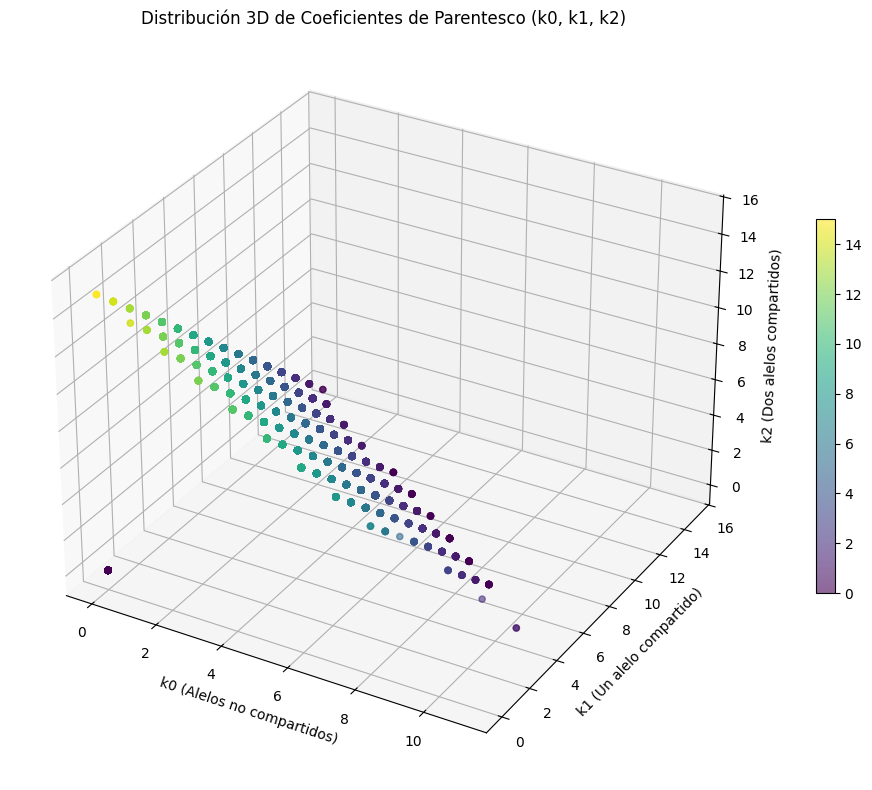

In [10]:
# Crear una nueva figura para la visualización 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Extraer los datos
X = db["k0"].values
Y = db["k1"].values  
Z = db["k2"].values

# Crear scatter plot 3D
scatter = ax.scatter3D(X, Y, Z, c=Z, cmap='viridis', alpha=0.6, s=20)

# Agregar barra de colores
fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=20)

# Configurar etiquetas y título
ax.set_xlabel('k0 (Alelos no compartidos)')
ax.set_ylabel('k1 (Un alelo compartido)')
ax.set_zlabel('k2 (Dos alelos compartidos)')
ax.set_title('Distribución 3D de Coeficientes de Parentesco (k0, k1, k2)')

# Agregar información estadística
print(f"Total de muestras: {len(X):,}")
print(f"Rangos de valores:")
print(f"  k0: {X.min()} - {X.max()}")
print(f"  k1: {Y.min()} - {Y.max()}")
print(f"  k2: {Z.min()} - {Z.max()}")

plt.tight_layout()
plt.show()

Distribución por tipo de parentesco:
Kinship
Hermandad     355110
Paternidad     17923
Name: count, dtype: int64


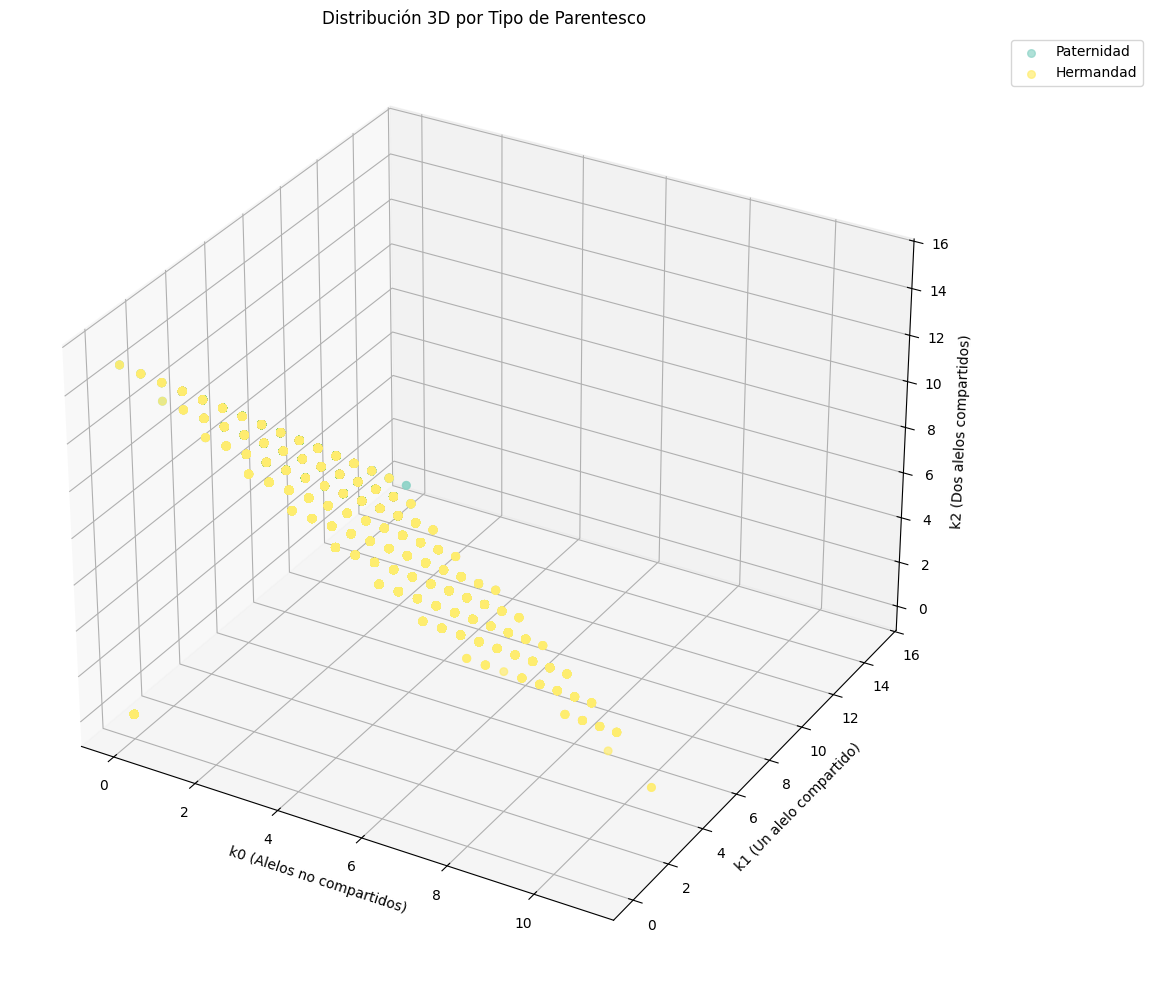

In [9]:
# Visualización coloreada por tipo de parentesco
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

# Obtener los tipos únicos de parentesco
kinship_types = db['Kinship'].unique()
colors = plt.cm.Set3(np.linspace(0, 1, len(kinship_types)))

# Crear scatter plot para cada tipo de parentesco
for i, kinship in enumerate(kinship_types):
    mask = db['Kinship'] == kinship
    X_subset = db[mask]["k0"].values
    Y_subset = db[mask]["k1"].values
    Z_subset = db[mask]["k2"].values
    
    ax.scatter(X_subset, Y_subset, Z_subset, 
              c=[colors[i]], label=kinship, alpha=0.7, s=30)

# Configurar etiquetas y título
ax.set_xlabel('k0 (Alelos no compartidos)')
ax.set_ylabel('k1 (Un alelo compartido)')
ax.set_zlabel('k2 (Dos alelos compartidos)')
ax.set_title('Distribución 3D por Tipo de Parentesco')

# Agregar leyenda
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar distribución por tipo de parentesco
print("Distribución por tipo de parentesco:")
print(db['Kinship'].value_counts())

plt.tight_layout()
plt.show()

In [6]:
# Analizar la estructura de los datos
print("Forma del dataset:", db.shape)
print("\nColumnas disponibles:", db.columns.tolist())
print("\nPrimeras filas:")
print(db.head())

print("\nForma de k0:", db["k0"].values.shape)
print("Forma de k1:", db["k1"].values.shape)
print("Forma de k2:", db["k2"].values.shape)

print("\nTipos de datos:")
print(db[["k0", "k1", "k2"]].dtypes)

Forma del dataset: (373033, 19)

Columnas disponibles: ['Shared_Markers', 'k0', 'k1', 'k2', 'Share_allele', 'Value', 'True_positive', 'Marcadores', 'Software', 'Datos', 'Kinship', 'File', 'Hoja', 'Sheet', 'Value_range', 'FAM_Sample_info_id', 'FAM_Sample_info_rel', 'VIC_Sample_info_id', 'VIC_Sample_info_rel']

Primeras filas:
   Shared_Markers  k0  k1  k2  Share_allele         Value  True_positive  \
0              15   0   1  14            29  1.383970e+09          False   
1              15   0   5  10            25  2.098410e+06          False   
2              15   0   8   7            22  1.816290e+06          False   
3              15   0   7   8            23  1.209710e+06           True   
4              15   0   6   9            24  4.401180e+05          False   

   Marcadores     Software Datos     Kinship  \
0          15  BlindSearch  Real  Paternidad   
1          15  BlindSearch  Real  Paternidad   
2          15  BlindSearch  Real  Paternidad   
3          15  BlindSear